In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Case 1: Binomial Trees

Asha de Meij (i6254733)

**Task:** Consider the unit-linked contract with maturity guarantee that was discussed in the lecture.
Take the risk-free rate equal to r = 1%, the volatility of the investment fund o = 15% and
the final guaranteed amount at T = 10 equal to 100 (i.e., we have a contract with a 0%
guarantee).

We want to use a binomial tree with increasing number of steps to compute the price of this
contract. In the lecture we used 4 time-steps, but this is not realistic. Make a computer
program where you increase the number of steps in the binomial tree from 4 to 100 and
make a graph of how the price of the contract as a function of the number of steps develops.

**Questions:**
- Can you explain the pattern that you see in the graph? To help you investigate the
convergence pattern, make an extra plot of the stock price S, in two nearest nodes
at T = 10, just above and below the guarantee level, as a function of the number of
steps.
- When you keep the number of steps fixed (say 100), how does the price of the
contract change if you change r or o or T. Can you explain these changes?
- Can you modify your program to make it run faster (e.g., for a tree with 10 000
steps)? If so, what changes did you make compared to your initial code? Describe
how you have analysed the run-time of the code.

https://github.com/gokkayahmet/PRICING-DERIVATIVES-WITH-BINOMIAL-TREE-MODEL/blob/main/PRICING%20DERIVATIVES%20WITH%20BINOMIAL%20TREE%20MODEL.ipynb

# Code

In [2]:
# initialization
r = 0.01
sigma = 0.15
T = 10 # maturity
guarantee = 100
n = 100

In [6]:
def get_optionPrice(r, sigma, T, guarantee, n):
    # Defining the parameters
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    R_dt = np.exp(r*dt) # growth factor at each time step
    p = (R_dt - d) / (u - d) # Risk-neutral probability


    # calculate the stock price
    stockValues = np.zeros((n+1, n+1))
    stockValues[0,0] = 100 # Initial value

    for i in range(1,n+1):
        stockValues[i,0] = u*stockValues[i-1,0]
        for j in range(1,i+1):
           stockValues[i,j] = d*stockValues[i-1,j-1]


    # 2. Calculate the contract price: recursive procedure
    contractPrice = np.zeros((n+1, n+1))

    # for i in range(n+1):
    #     contractPrice[n,i] = np.maximum(stockValues[n,i] - guarantee, 0) # 0 = contract is worthless

    contractPrice[n,:] = np.maximum(guarantee-stock[n,:],0)


    for i in range(n - 1, -1, -1):
        for j in range(i+1):
            contractPrice[i,j] = R_dt*(p*contractPrice[i+1,j]+(1-p)*contractPrice[i+1,j+1])
       
    return contractPrice[0,0]

In [37]:
# vars from class
sigma = 0.15
r = 0.05

T = 2
guarantee = 100
n = 100 # number of steps

Price of contract: 28.03827257438691


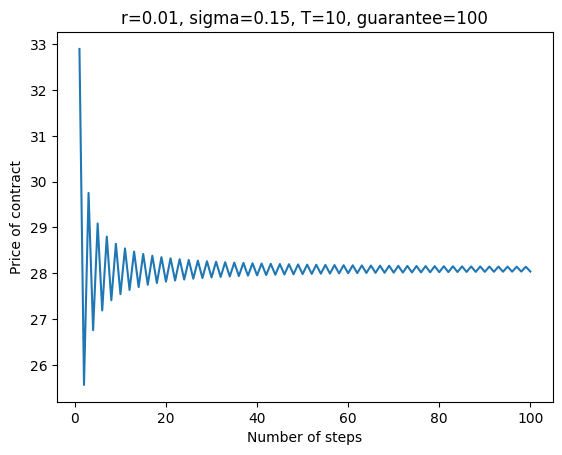

In [7]:
# create a method to plot the price of the contract as a function of the number of steps
def plot_price(r, sigma, T, guarantee, n, pricing=get_optionPrice):
    steps = np.arange(1, n+1)
    price = np.zeros(len(steps))
    for i in range(len(steps)):
        price[i] = pricing(r, sigma, T, guarantee, steps[i])
    plt.plot(steps, price)
    plt.xlabel("Number of steps")
    plt.ylabel("Price of contract")
    plt.title("r={}, sigma={}, T={}, guarantee={}".format(r, sigma, T, guarantee))
    plt.show()

# Task parameters
r = 0.01
sigma = 0.15
T = 10
guarantee = 100
n = 100 # number of steps
# plot price
print("Price of contract: {}".format(get_optionPrice(r, sigma, T, guarantee, n)))
plot_price(r, sigma, T, guarantee, n)

# Fabians code

Price of contract: 7.641011877247814


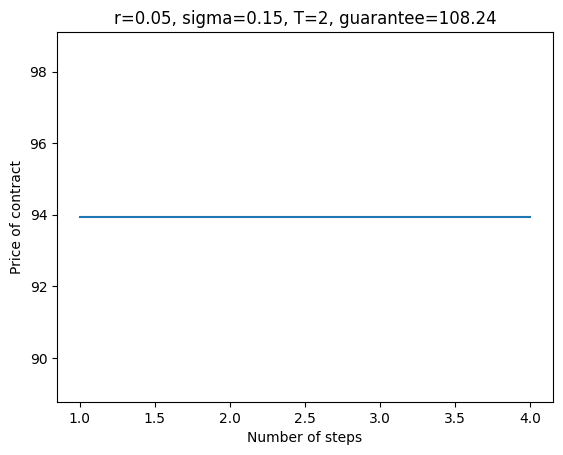

In [21]:
# create function to calculate the price of contract
def price_contract(r,sigma,T,guarantee, n, initial_price=100):
    dt = T/n
    R = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (R-d)/(u-d)

    # create matrix to store stock prices
    stock = np.zeros((n+1,n+1))
    stock[0,0] = initial_price
    for i in range(1,n+1):
        stock[i,0] = stock[i-1,0]*u
        for j in range(1,i+1):
            stock[i,j] = stock[i-1,j-1]*d

    # create matrix to store option prices
    option = np.zeros((n+1,n+1))
    option[n,:] = np.maximum(guarantee-stock[n,:],0)

    # calculate option prices at each node
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            option[i,j] = np.exp(-r*dt)*(p*option[i+1,j]+(1-p)*option[i+1,j+1])

    return option[0,0]
# create a method to plot the price of the contract as a function of the number of steps
def plot_price(r,sigma,T,guarantee,n, pricing=price_contract):
    steps = np.arange(1,n+1)
    price = np.zeros(len(steps))
    for i in range(len(steps)):
        price[i] = pricing(r,sigma,T,guarantee,steps[i],n)
    plt.plot(steps,price)
    plt.xlabel("Number of steps")
    plt.ylabel("Price of contract")
    plt.title("r={}, sigma={}, T={}, guarantee={}".format(r,sigma,T,guarantee))
    plt.show()
# initialize variables as from the slides as santiy check
r = 0.05
sigma = 0.15
T = 2
guarantee = 108.24
n = 4 # number of steps

# plot price
print("Price of contract: {}".format(price_contract(r,sigma,T,guarantee,n)))
plot_price(r,sigma,T,guarantee, n=4)

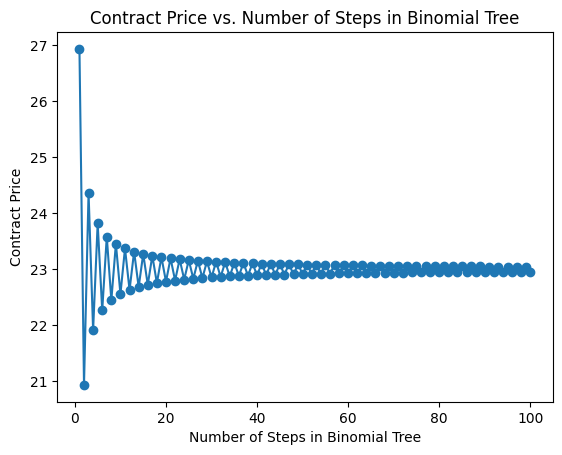

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100       # Initial stock price
r = 0.01       # Risk-free rate
sigma = 0.15   # Volatility
T = 10         # Maturity
G = 100        # Guaranteed amount (strike price)
steps_range = range(1, 101)  # Number of steps from 4 to 100

# Function to calculate the binomial option price
def binomial_tree_pricing(S0, r, sigma, T, G, steps):
    dt = T / steps                   # Time step
    u = np.exp(sigma * np.sqrt(dt))   # Up factor
    d = 1 / u                         # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Probability of up movement
    
    # Initialize asset prices at maturity
    asset_prices = np.array([S0 * (u ** j) * (d ** (steps - j)) for j in range(steps + 1)])
    option_values = np.maximum(asset_prices - G, 0)  # Payoff at maturity
    
    # Backward induction to calculate the option price
    for i in range(steps - 1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[1:i+2] + (1 - p) * option_values[0:i+1])
    
    return option_values[0]  # Price at the root of the tree

# Calculate and plot contract price as function of steps
prices = [binomial_tree_pricing(S0, r, sigma, T, G, steps) for steps in steps_range]

plt.plot(steps_range, prices, marker='o')
plt.xlabel('Number of Steps in Binomial Tree')
plt.ylabel('Contract Price')
plt.title('Contract Price vs. Number of Steps in Binomial Tree')
plt.show()
